# Vertex Cover Problem

Given a graph $G=(V,E)$, find the minimum set of vertices that covers all edges in graph.

## Variables:

$$
x_i = \begin{cases}
1 \text{ if vertex $i$ is selected } \\
0 \text{ otherwise }
\end{cases}
$$

## Formulation:

\begin{eqnarray}
min && \sum_{i \in V} x_i\\
s.t.\\
x_i + x_j \geq 1 , &&&& \forall (i,j) \in E\\
x_i \in {\{0,1\}} , &&&& \forall i \in V
\end{eqnarray}

In [22]:
import networkx as nx
import gurobipy as gb
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
# create the graph
G = nx.Graph()

In [24]:
# add vertices
G.add_nodes_from([1,2,3,4,5,6,7,8])

In [25]:
# add edges
G.add_edges_from([(1,2),(1,4),(1,6),(2,3),(2,4),(3,5),(3,8),(4,7),(5,8),(6,7),(7,8)])

G:


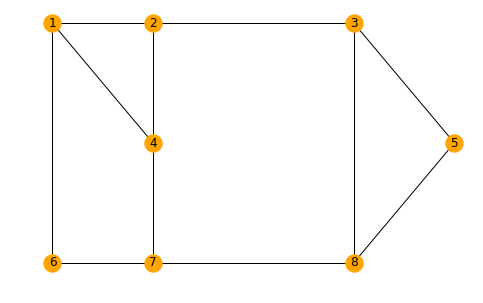

In [26]:
# plot G

plt.figure(figsize=(8,5))
plt.axis('off')

pos = {1:(0,2),2:(1,2),3:(3,2),4:(1,1),5:(4,1),6:(0,0),7:(1,0),8:(3,0)}
node_labels = {i:i for i in G.nodes()}

nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_color='orange')
nx.draw_networkx_edges(G,pos,edgelist=G.edges())
nx.draw_networkx_labels(G,pos,labels=node_labels)

print("G:")

In [27]:
# gurobi model
vertex_cover = gb.Model()

In [28]:
# set vars
x = vertex_cover.addVars(G.nodes(),vtype=gb.GRB.BINARY,name='x')

In [29]:
# set objective function
vertex_cover.setObjective(x.sum('*'), gb.GRB.MINIMIZE)

In [30]:
# add constraints
for i,j in G.edges():
    name = "edge_%s_%s" % (i,j)
    vertex_cover.addConstr(x[i] + x[j] >= 1, name=name)

In [31]:
# update model
vertex_cover.update()

In [32]:
# write model
vertex_cover.write('vertexcover.lp')

In [33]:
# optimize
vertex_cover.optimize()

Optimize a model with 11 rows, 8 columns and 22 nonzeros
Variable types: 0 continuous, 8 integer (8 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 5.0000000
Presolve removed 11 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: 5 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.000000000000e+00, best bound 5.000000000000e+00, gap 0.0000%


In [34]:
# print solution
print("Obj:",vertex_cover.ObjVal,end='\n\n')

for i in vertex_cover.getVars():
    print("%s = %g" % (i.VarName,i.x))

Obj: 5.0

x[1] = 1
x[2] = -0
x[3] = 1
x[4] = 1
x[5] = -0
x[6] = 0
x[7] = 1
x[8] = 1


sol G:


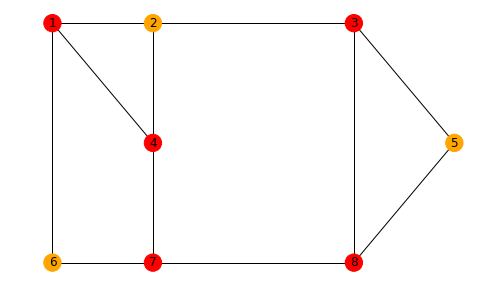

In [35]:
# plot solution graph
plt.figure(figsize=(8,5))
plt.axis('off')

node_colors = ['red' if i.x == 1 else 'orange' for i in vertex_cover.getVars()]

nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_color=node_colors)
nx.draw_networkx_edges(G,pos,edgelist=G.edges())
nx.draw_networkx_labels(G,pos,labels=node_labels)

print("sol G:")